In [61]:
#!conda install --yes -c conda-forge/label/gcc7 contextily
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import re
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

seattle_data=pd.read_csv('seattle_incidents_summer_2014.csv', parse_dates=['Date Reported', 'Occurred Date or Date Range Start', 'Occurred Date Range End'], infer_datetime_format=True, low_memory=False) 
seattle_data.head()
#seattle_data.info()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,2015-06-28 10:31:00,2014-06-28 10:31:00,2015-06-28 10:31:00,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,2015-06-24 11:09:00,2014-06-01 00:00:00,2015-06-24 11:09:00,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,2015-06-22 09:22:00,2014-08-31 09:00:00,NaT,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,2015-06-21 15:52:00,2014-06-20 13:38:00,NaT,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,2015-06-20 11:59:00,2014-06-01 11:59:00,2014-11-01 12:00:00,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [182]:
seattle_data['Offense Type'].value_counts()[:20]

THEFT-CARPROWL                    6230
VEH-THEFT-AUTO                    2588
THEFT-OTH                         2221
PROPERTY DAMAGE-NON RESIDENTIA    1638
ASSLT-NONAGG                      1320
DISTURBANCE-OTH                   1295
BURGLARY-FORCE-RES                1147
BURGLARY-NOFORCE-RES              1118
PROPERTY FOUND                    1069
THEFT-SHOPLIFT                     944
THEFT-BUILDING                     846
THEFT-BICYCLE                      797
WARRARR-FELONY                     565
BURGLARY-FORCE-NONRES              524
HARASSMENT                         523
TRESPASS                           486
FRAUD-IDENTITY THEFT               458
FRAUD-CREDIT CARD                  443
ASSLT-AGG-WEAPON                   421
PROPERTY DAMAGE-RESIDENTIAL        419
Name: Offense Type, dtype: int64

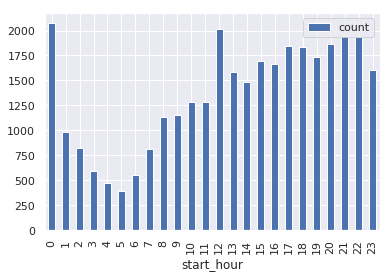

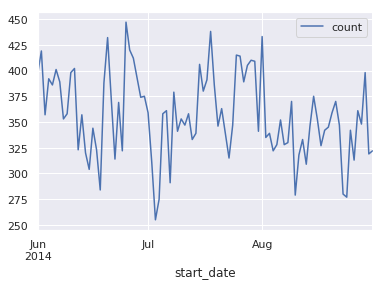

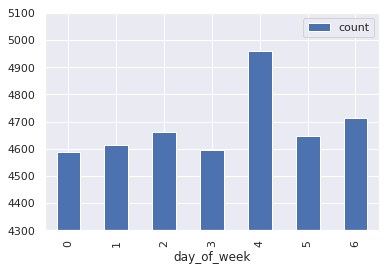

In [63]:
timeind = pd.DatetimeIndex(seattle_data['Occurred Date or Date Range Start'])
seattle_data['start_date'] = timeind.date.astype('datetime64')
seattle_data['start_hour'] = timeind.hour
seattle_data['day_of_week'] = timeind.dayofweek
by_hour = seattle_data.groupby('start_hour').agg(['count'])
by_hour['RMS CDW ID'].plot(kind='bar')

by_date = seattle_data.groupby('start_date').agg(['count'])
by_date['RMS CDW ID'].plot()

by_dow = seattle_data.groupby('day_of_week').agg(['count'])
by_dow['RMS CDW ID'].plot(kind='bar', ylim=(4300,5100))

/home/alex/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

/home/alex/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

/home/alex/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

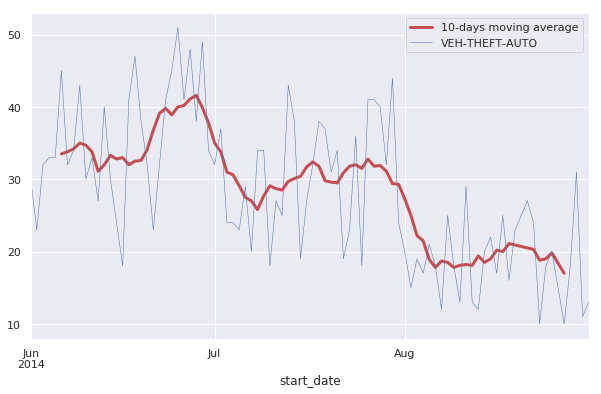

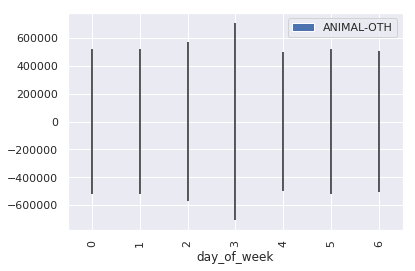

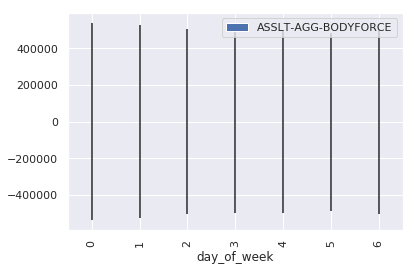

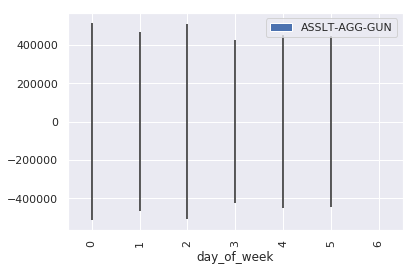

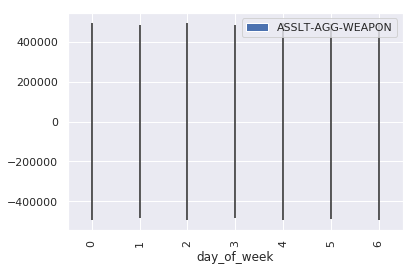

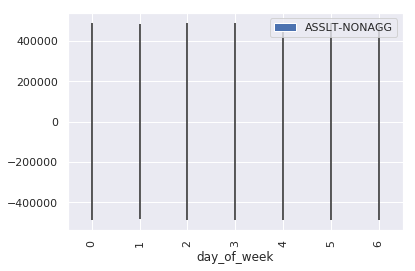

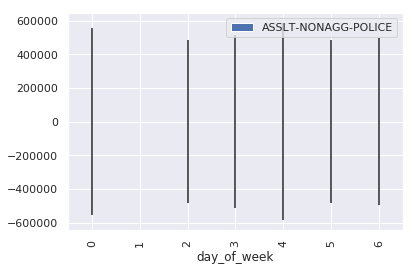

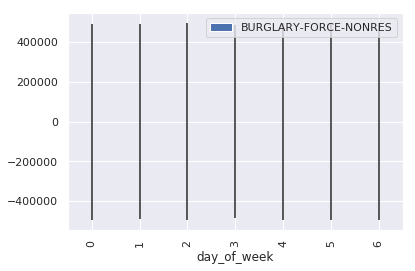

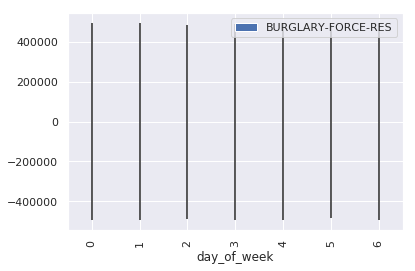

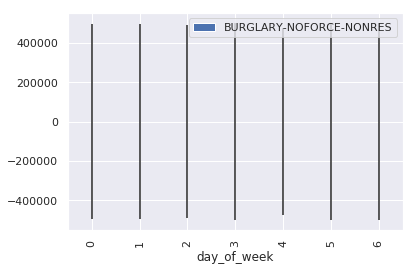

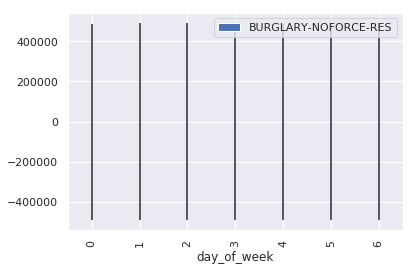

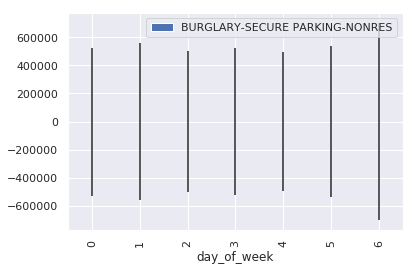

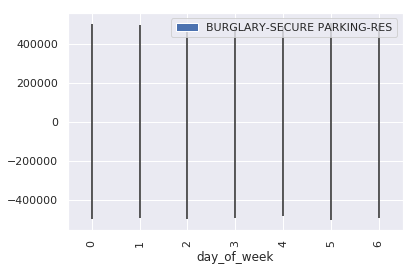

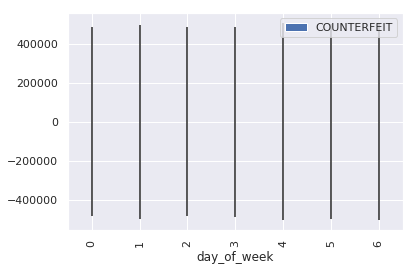

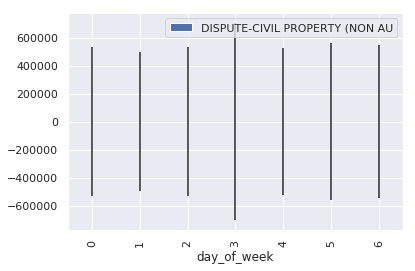

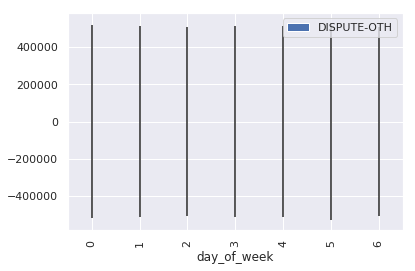

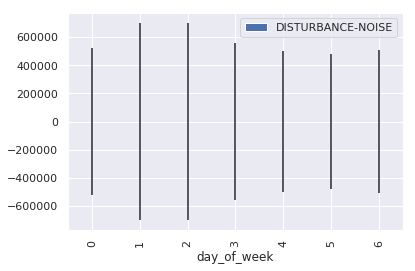

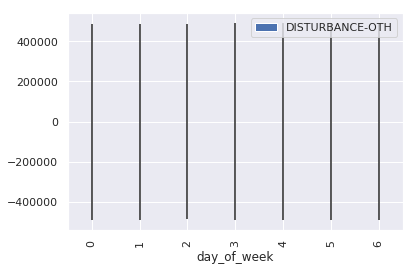

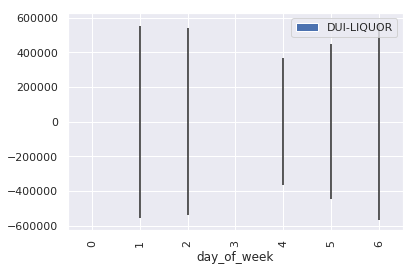

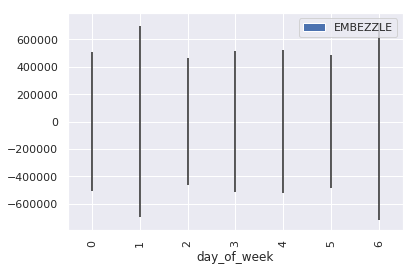

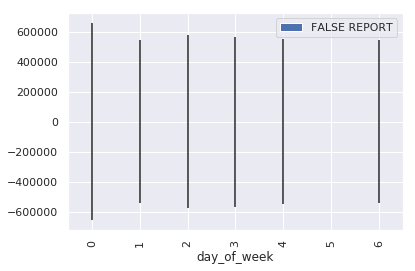

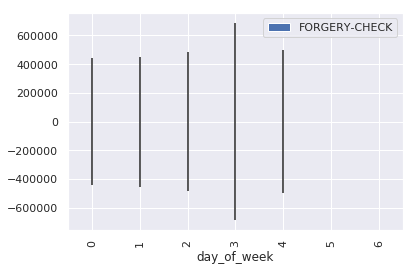

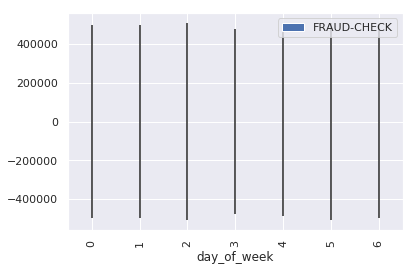

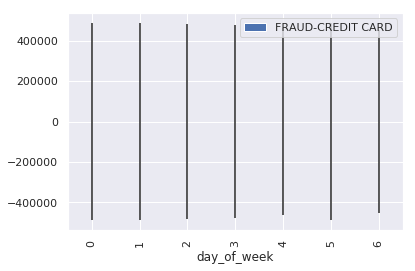

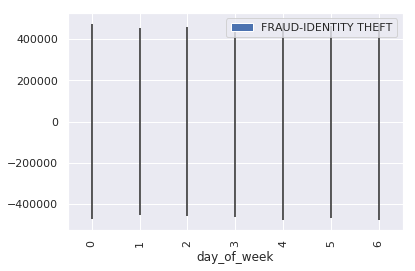

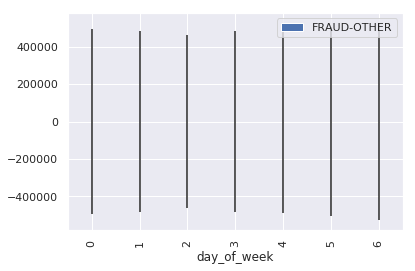

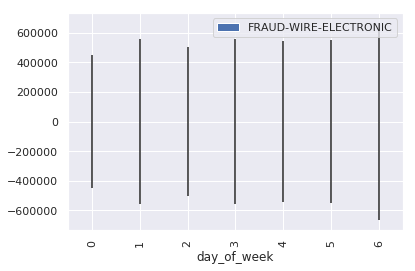

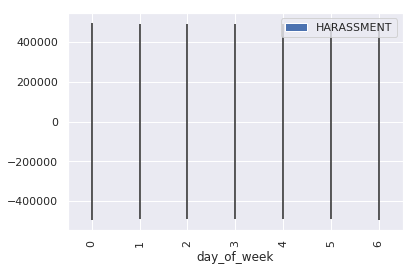

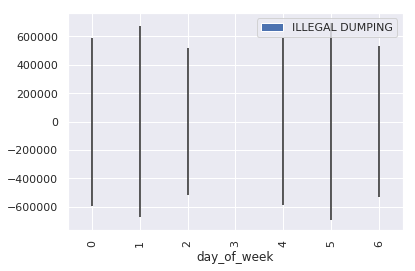

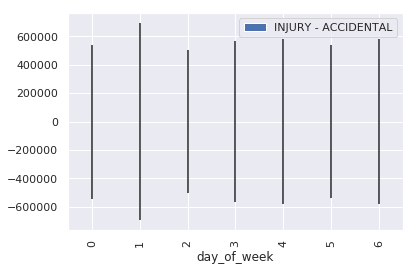

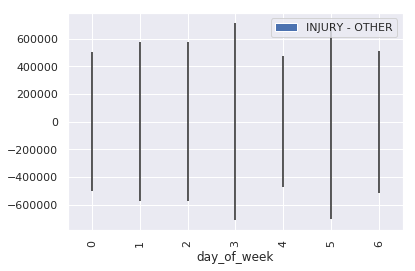

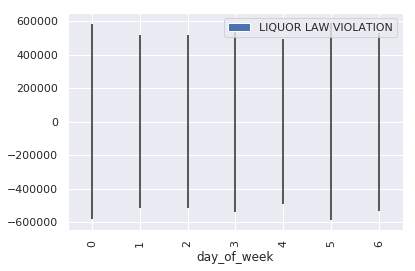

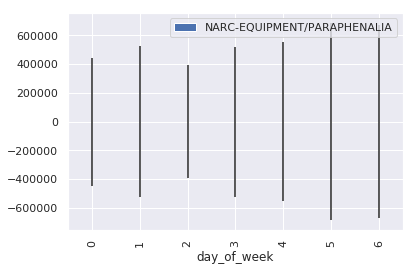

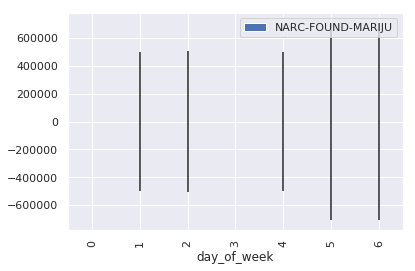

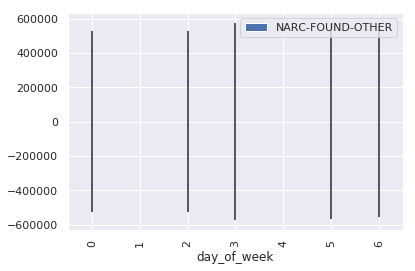

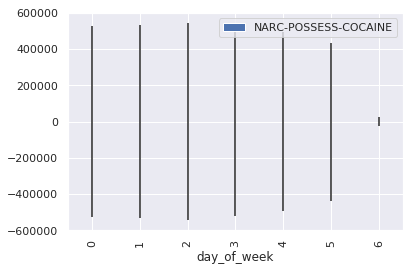

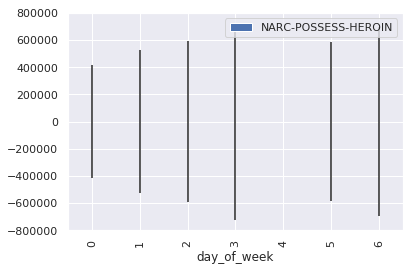

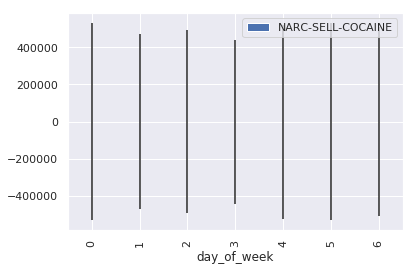

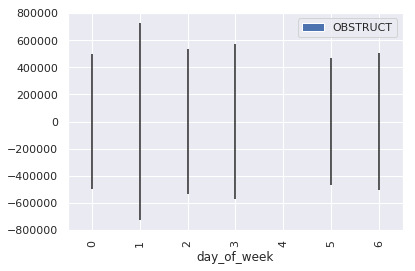

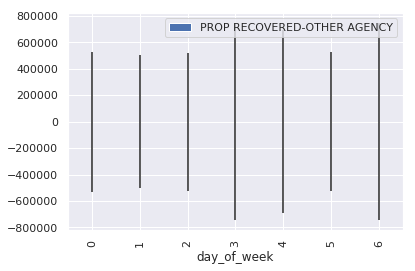

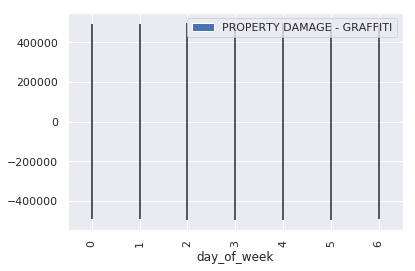

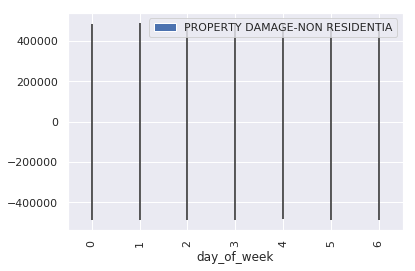

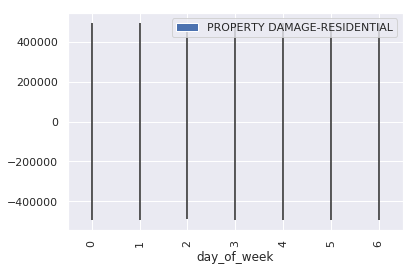

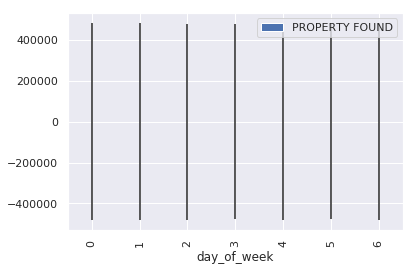

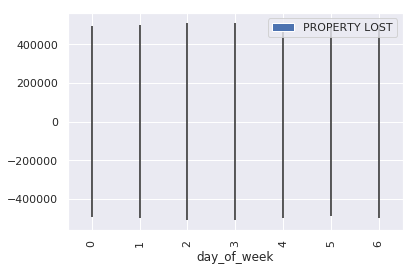

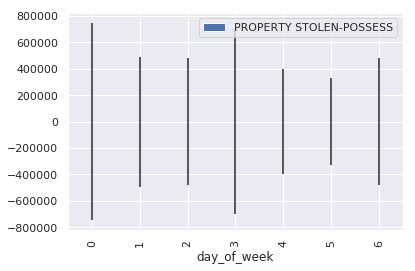

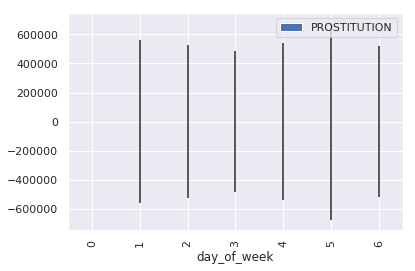

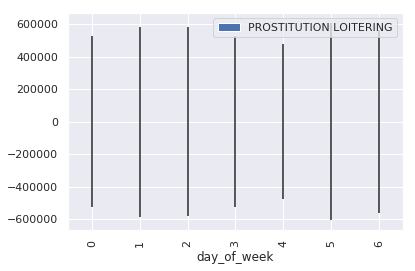

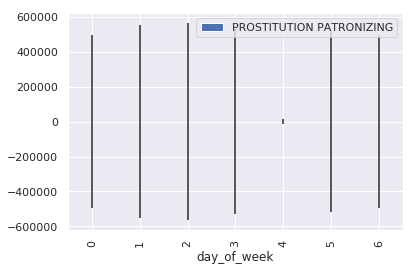

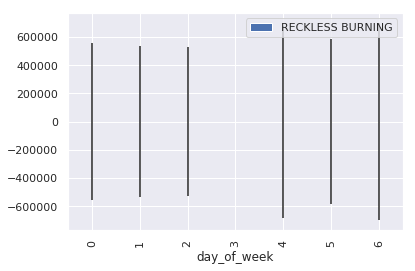

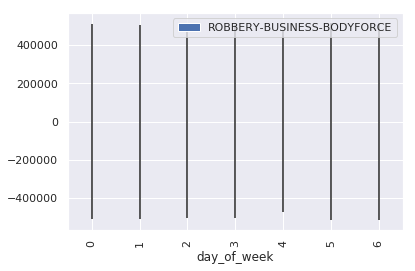

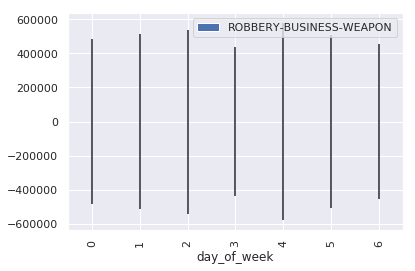

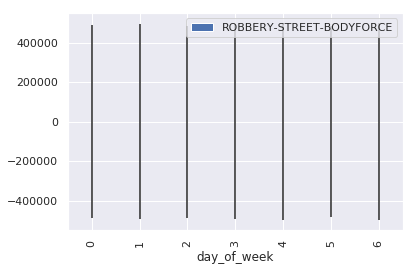

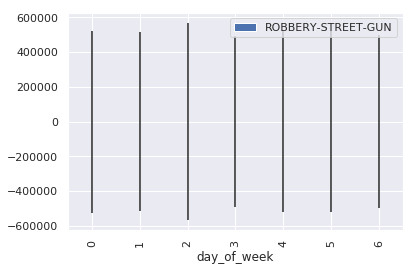

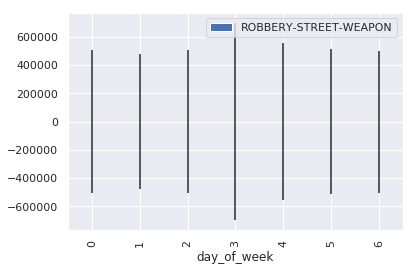

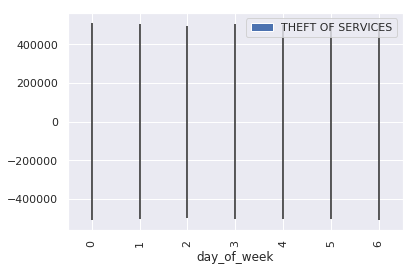

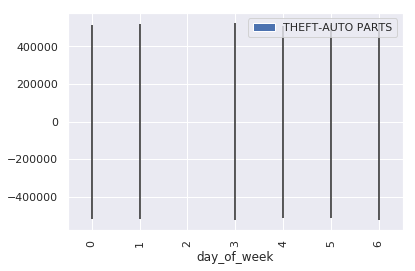

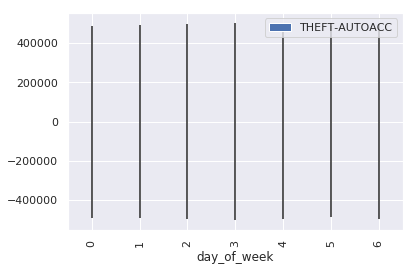

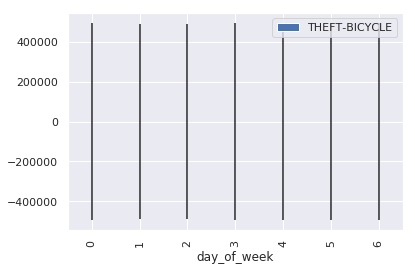

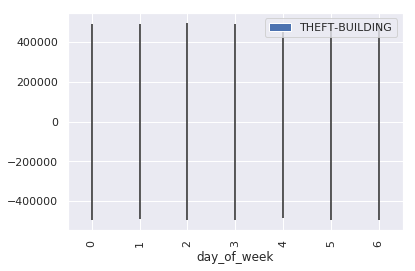

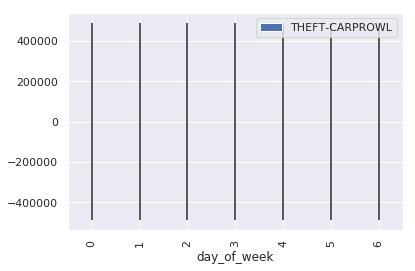

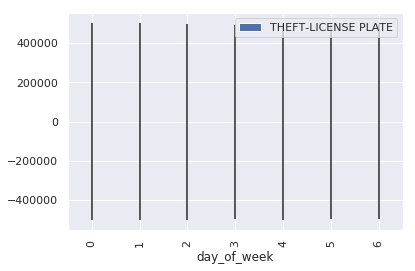

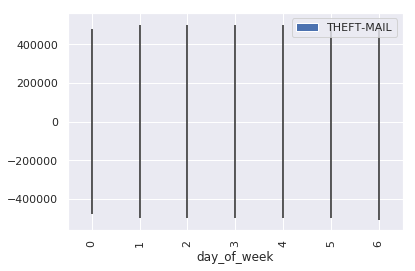

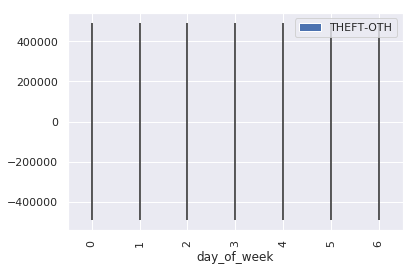

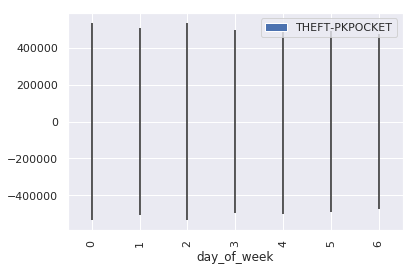

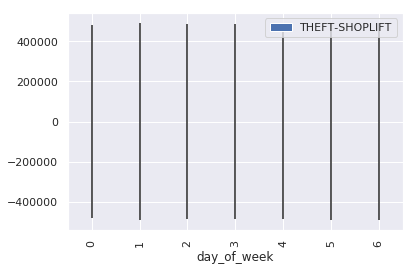

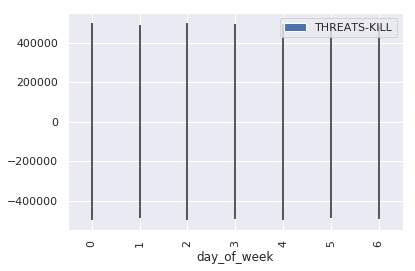

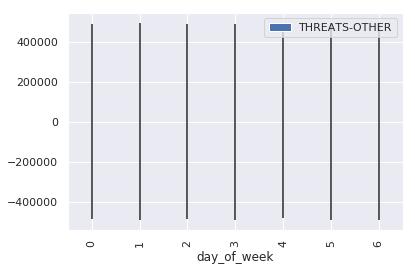

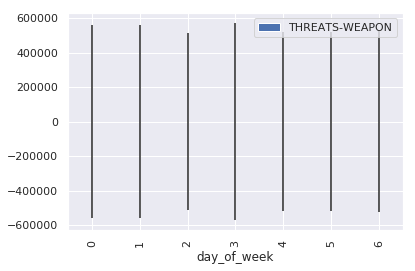

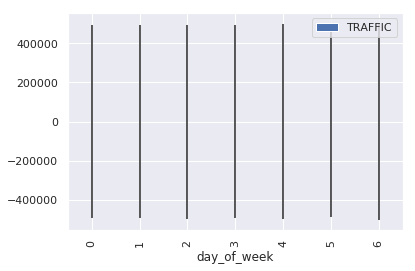

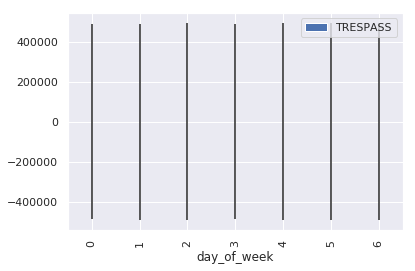

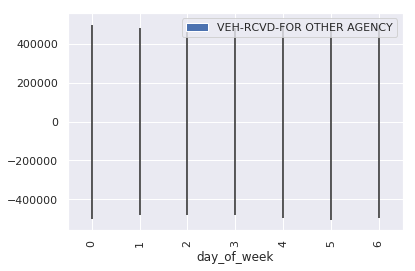

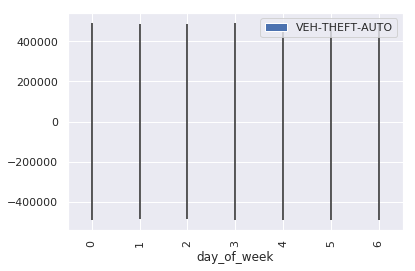

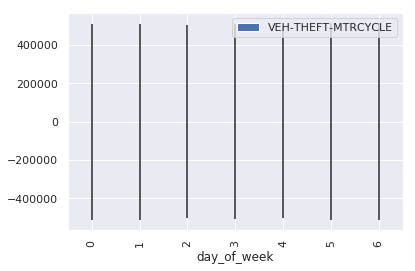

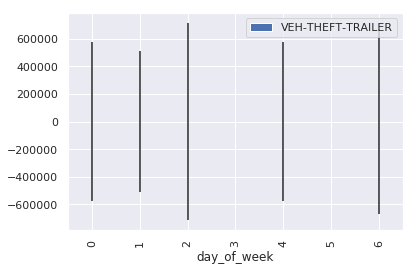

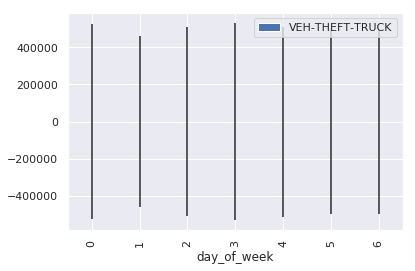

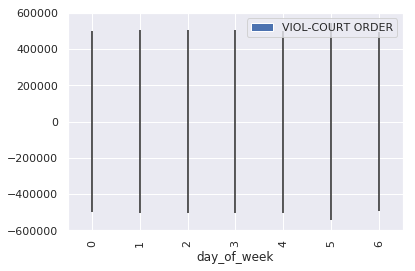

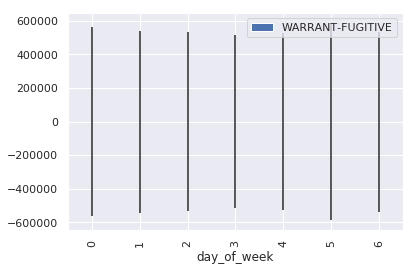

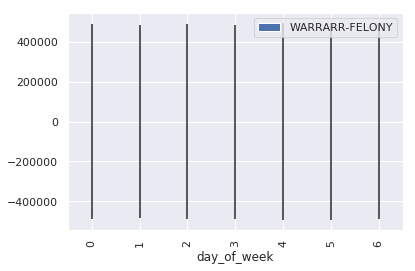

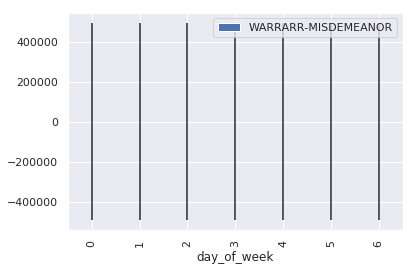

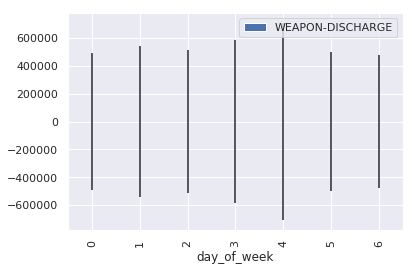

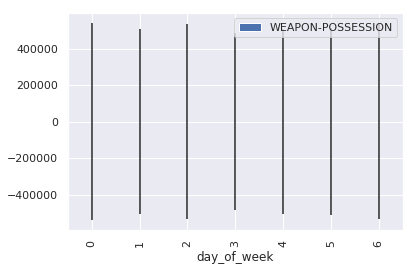

In [361]:
pivot_by_date = seattle_data.pivot_table('RMS CDW ID', aggfunc='count', index='start_date', columns='Offense Type')
pivot_by_hour = seattle_data.pivot_table('RMS CDW ID', aggfunc='count', index='start_hour', columns='Offense Type')
pivot_by_date.fillna(0.0, inplace=True)
pivot_by_hour.fillna(0.0, inplace=True)
#pivot_by_date['WARRARR-FELONY'].plot0
plt.figure(figsize=(10, 6))
pivot_by_date['ave_VEH-THEFT-AUTO']=pivot_by_date['VEH-THEFT-AUTO'].rolling(10, center=True).mean()
pivot_by_date['ave_VEH-THEFT-AUTO'].plot(color='r', linewidth=3, legend=True, label='10-days moving average')
pivot_by_date['VEH-THEFT-AUTO'].plot(linewidth=0.5, legend=True)

pivot_by_dow = seattle_data.pivot_table('RMS CDW ID', aggfunc='count', index='day_of_week', columns='Offense Type')
pivot_by_dow.fillna(0.0, inplace=True)
pivot_by_dow_err = seattle_data.pivot_table('RMS CDW ID', aggfunc='std', index='day_of_week', columns='Offense Type')


New information


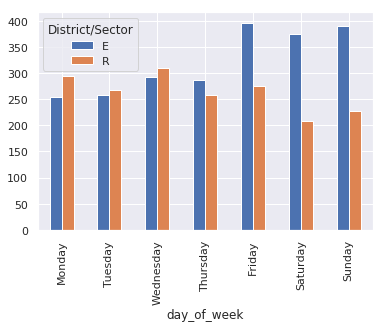

In [377]:
pivot_by_district = seattle_data.pivot_table('RMS CDW ID', aggfunc='count', index='day_of_week', columns='District/Sector')
pivot_by_district.fillna(0, inplace=True)
week   = ['Monday', 'Tuesday', 'Wednesday',  'Thursday',  'Friday', 'Saturday', 'Sunday']
pivot_by_district[['E', 'R']].plot(kind='bar', legend=True)
plt.xticks(range(7), week, rotation='vertical')
plt.show()

In [ ]:
new_seattle_data = seattle_data.dropna(subset=['Occurred Date Range End'])
timeind_end = pd.DatetimeIndex(new_seattle_data['Occurred Date Range End'])
new_seattle_data['end_date'] = timeind_end.date.astype('datetime64')
new_seattle_data['end_hour'] = timeind_end.hour
by_end_hour = new_seattle_data.groupby('end_hour').agg('count')
by_end_hour['RMS CDW ID'].plot(kind='bar')

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(16,8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1)

def add_inset(ax, rect, *args, **kwargs):
    box = ax.get_position()
    inax_position = ax.transAxes.transform(rect[0:2])
    infig_position = ax.figure.transFigure.inverted().transform(inax_position)
    new_rect = list(infig_position) + [bow.width*rect[2], box.height*rect[3]]
    return fig.add_axes(new_rect, *args, **kwargs)

#color_cycle = plt.rcParams['axes.color_cycle']

for i, col in enumerate(['THEFT-CARPROWL', 'THEFT-SHOPLIFT']):
    pivot_by_date[col].plot(ax=ax[i], title=col)
    ax[i].set_title(col)

In [67]:
#seattle_data['Occurred Date or Date Range Start'].value_counts()
pivot_by_hour.corr()

Offense Type,ANIMAL-BITE,ANIMAL-CRUELTY,ANIMAL-OTH,ASSLT-AGG-BODYFORCE,ASSLT-AGG-GUN,ASSLT-AGG-POLICE-BODYFORCE,ASSLT-AGG-POLICE-GUN,ASSLT-AGG-POLICE-WEAPON,ASSLT-AGG-WEAPON,ASSLT-NONAGG,...,WARRANT-FUGITIVE,WARRARR-FELONY,WARRARR-MISDEMEANOR,WEAPON-CONCEALED,WEAPON-DISCHARGE,WEAPON-POSSESSION,WEAPON-SELLING,WEAPON-SURRENDER-EXCLUDING FIR,WEAPON-UNLAWFUL USE,[INC - CASE DC USE ONLY]
Offense Type,,,,,,,,,,,,,,,,,,,,,
ANIMAL-BITE,1.000000,0.774597,-0.066786,0.160625,0.060858,NaN,NaN,NaN,0.001742,0.362557,...,0.054767,0.319990,0.206278,NaN,-0.312956,0.076143,NaN,NaN,NaN,NaN
ANIMAL-CRUELTY,0.774597,1.000000,0.555556,-0.471405,NaN,NaN,NaN,NaN,-0.903440,0.406181,...,1.000000,-0.234206,-0.816497,NaN,-1.000000,-0.755929,NaN,NaN,NaN,NaN
ANIMAL-OTH,-0.066786,0.555556,1.000000,0.368330,-0.229851,NaN,NaN,NaN,0.240579,0.316634,...,0.736569,-0.111840,0.056754,NaN,0.573577,0.102112,NaN,NaN,-0.111979,NaN
ASSLT-AGG-BODYFORCE,0.160625,-0.471405,0.368330,1.000000,0.069315,NaN,NaN,1.0,0.630610,0.409126,...,0.126514,-0.323536,0.035261,NaN,0.416302,-0.157944,NaN,NaN,0.178326,-1.0
ASSLT-AGG-GUN,0.060858,NaN,-0.229851,0.069315,1.000000,NaN,NaN,1.0,-0.416676,0.071920,...,-0.477219,-0.311279,-0.399817,NaN,-0.173057,-0.106354,NaN,NaN,NaN,-1.0
ASSLT-AGG-POLICE-BODYFORCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASSLT-AGG-POLICE-GUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASSLT-AGG-POLICE-WEAPON,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.0,-1.000000,1.000000,...,NaN,-1.000000,-1.000000,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN
ASSLT-AGG-WEAPON,0.001742,-0.903440,0.240579,0.630610,-0.416676,NaN,NaN,-1.0,1.000000,0.608842,...,0.161507,0.100114,0.474478,NaN,0.452241,0.107851,NaN,NaN,-0.507085,-1.0


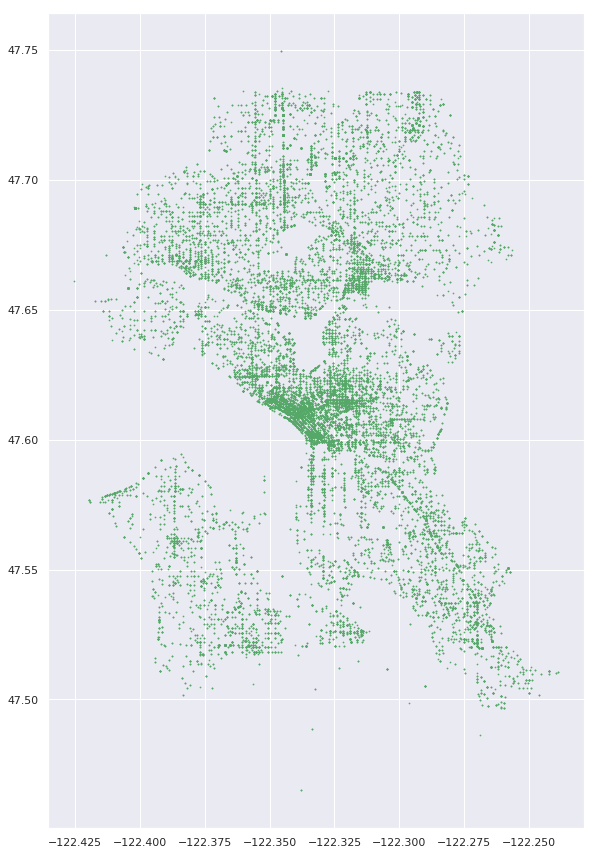

In [274]:
geo_seattle_data = seattle_data[seattle_data['Longitude'] != 0.0]
seattle_geometry = [Point(xy) for xy in zip(geo_seattle_data['Longitude'], geo_seattle_data['Latitude'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(geo_seattle_data, crs=crs, geometry=seattle_geometry)
gdf.plot(marker='o', markersize=0.5, color='g', figsize=(10,15), legend=True, label='Dot')
#plt.scatter(geo_seattle_data['Longitude'], geo_seattle_data['Latitude'])

In [69]:
sanfrancisco_data=pd.read_csv('sanfrancisco_incidents_summer_2014.csv', parse_dates=['Date', 'Time'], infer_datetime_format=True, low_memory=False) 
#sanfrancisco_data.set_index('IncidntNum', inplace=True)
sanfrancisco_data.index
sanfrancisco_data.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,2014-08-31,2019-04-15 23:50:00,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,2014-08-31,2019-04-15 23:45:00,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2014-08-31,2019-04-15 23:30:00,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2014-08-31,2019-04-15 23:30:00,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,2014-08-31,2019-04-15 23:23:00,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


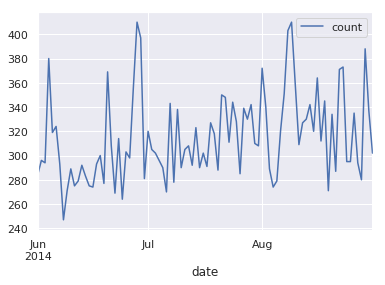

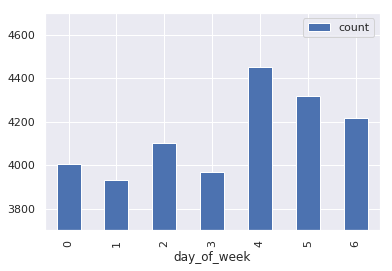

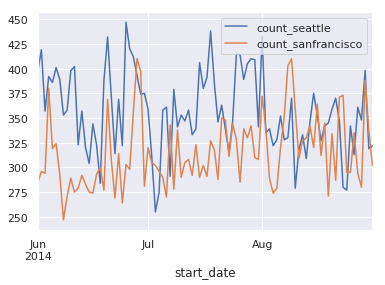

In [70]:
timeind2 = pd.DatetimeIndex(sanfrancisco_data['Time'])
timeind3 = pd.DatetimeIndex(sanfrancisco_data['Date'])
sanfrancisco_data['date'] = timeind3.date.astype('datetime64')
sanfrancisco_data['hour'] = timeind2.hour
sanfrancisco_data['day_of_week'] = timeind3.dayofweek
by_hour2 = sanfrancisco_data.groupby('hour').agg(['count'])

#by_hour2['IncidntNum'].plot(kind='bar')

by_date2 = sanfrancisco_data.groupby('date').agg(['count'])
by_date2['IncidntNum'].plot()

by_dow2 = sanfrancisco_data.groupby('day_of_week').agg(['count'])
by_dow2['IncidntNum'].plot(kind='bar', ylim=(3700,4700))

#bh = by_hour['RMS CDW ID'].join(by_hour2['IncidntNum'], lsuffix='_seattle', rsuffix='_sanfrancisco')
#bh.corr()
#bh.plot(kind='bar')

bd = by_date['RMS CDW ID'].join(by_date2['IncidntNum'], lsuffix='_seattle', rsuffix='_sanfrancisco')
bd.corr()
bd.plot()


In [71]:
sanfrancisco_data['minutes']=sanfrancisco_data['Time'].apply(lambda x: x[3:])
h = sanfrancisco_data.groupby('minutes').agg(['count'])
h['Category'].plot(kind='bar')
plt.show()

TypeError: 'Timestamp' object is not subscriptable

In [76]:
sanfrancisco_data['minutes'] = sanfrancisco_data['minutes'].astype(int)
sanfrancisco_data['min_fraq'] = sanfrancisco_data['minutes'].apply(lambda x: x%30)
sanfrancisco_data['min_fraq'].value_counts().plot(kind='bar')

KeyError: 'minutes'

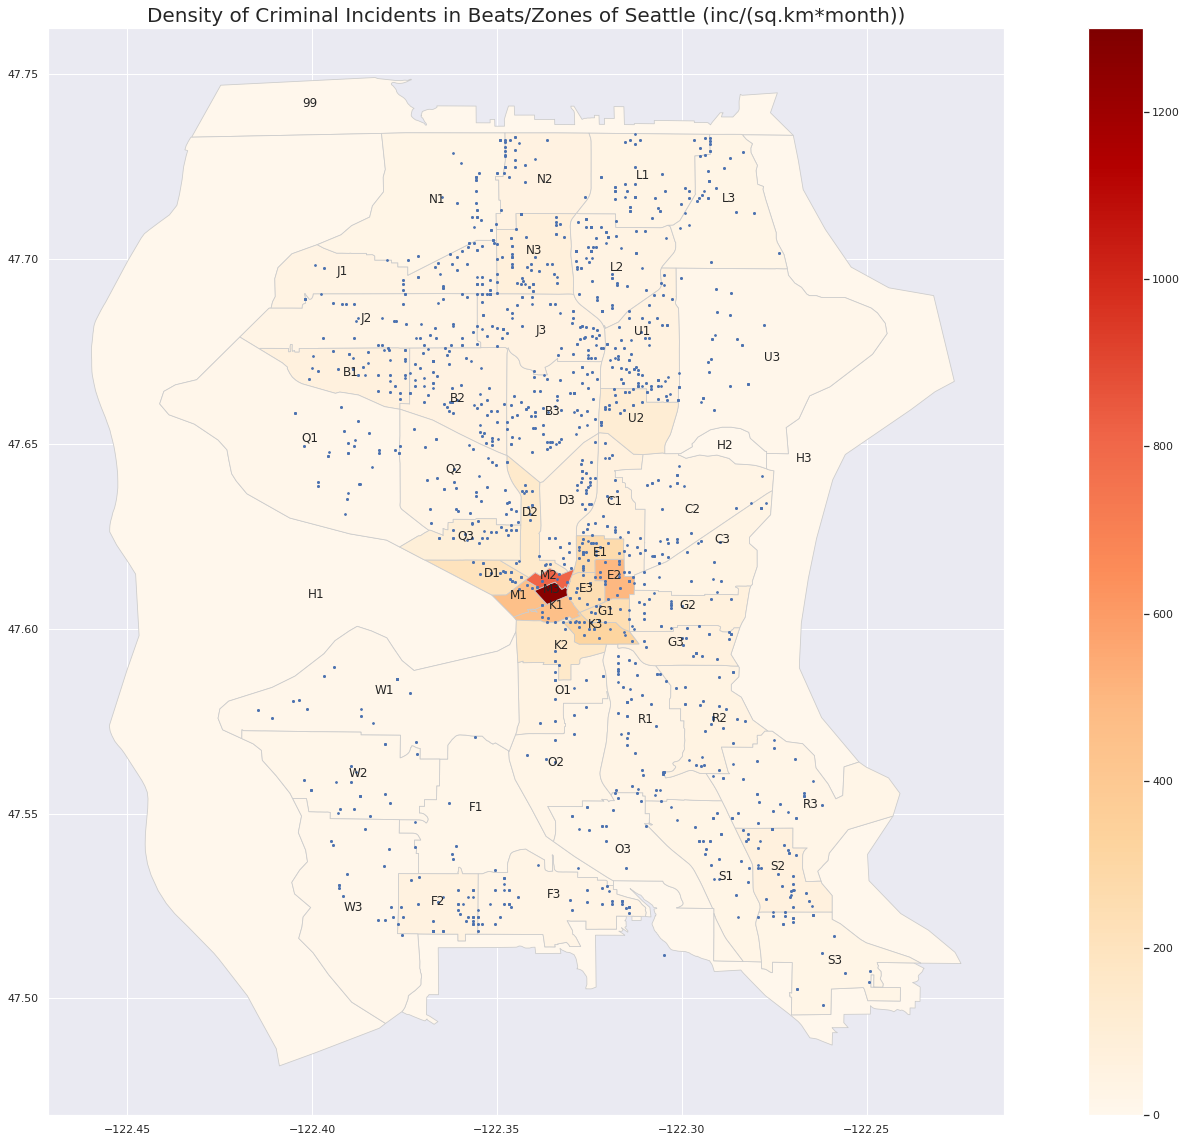

In [275]:
shpp = 'Seattle_Police_Beats_2018Present.shp'
map_df = gpd.read_file(shpp)
map_df=map_df.to_crs(epsg=4326)
#map_df.plot(figsize=(10,15), alpha=0.5, edgecolor='k')
by_sector = seattle_data.groupby('Zone/Beat').count()
#by_sector['RMS CDW ID'].plot(kind='bar')
merged = map_df.set_index('beat').join(by_sector)
merged['density'] = (1.076e+7)*merged['RMS CDW ID']/merged['shape_Area']/3
vmin, vmax = 0, 1300
fig, ax = plt.subplots(1, figsize=(30, 20))
ax.set_title('Density of Criminal Incidents in Beats/Zones of Seattle (inc/(sq.km*month))', fontdict={'fontsize': 20, 'fontweight':3})
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
variable='density'
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
for idx, row in merged.iterrows():
    ax.annotate(s=idx, xy=row['coords'],
        horizontalalignment='center')
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

geo_seattle_data = seattle_data[seattle_data['Longitude'] != 0.0]
geo_seattle_data = geo_seattle_data[geo_seattle_data['Offense Type']=='VEH-THEFT-AUTO']
geo_seattle_data2 = seattle_data[seattle_data['Longitude'] != 0.0]
geo_seattle_data2 = geo_seattle_data2[geo_seattle_data2['Offense Type']=='THEFT-CARPROWL']
seattle_geometry = [Point(xy) for xy in zip(geo_seattle_data['Longitude'], geo_seattle_data['Latitude'])]
seattle_geometry2 = [Point(xy) for xy in zip(geo_seattle_data2['Longitude'], geo_seattle_data2['Latitude'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(geo_seattle_data, crs=crs, geometry=seattle_geometry)
gdf.plot(marker='o', markersize=3, color='b', ax=ax)
#gdf2 = gpd.GeoDataFrame(geo_seattle_data2, crs=crs, geometry=seattle_geometry2)
#gdf2.plot(marker='o', markersize=1, color='r', ax=ax)

fig.savefig("map_density.png", dpi=300)